In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
from datetime import datetime
from matplotlib import rcParams

from matplotlib import rc
rc('font',family='Malgun Gothic')

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

## 1. 데이터 불러오기

In [130]:
movie = pd.read_csv("../data/movie_data/merge_data.csv", parse_dates=['openingdate'])
movie.head()

,moviename,openingdate,sales,attendance,screen,playcount,country,distributor,director,genre,actor,filmrank
0,극한직업,2019-01-23,139651845516.0,16265618.0,2003.0,292584.0,한국,(주)씨제이이엔엠,이병헌,코미디,"류승룡(고반장), 이하늬(장형사), 진선규(마형사)",[국내] 15세 관람가
1,명량,2014-07-30,135748398910.0,17613682.0,1587.0,188611.0,한국,(주)씨제이이엔엠,정세교,다큐멘터리,"김한민, 오타니 료헤이, 이해영",[국내] 12세 관람가
2,어벤져스: 엔드게임,2019-04-24,122182694160.0,13934592.0,2835.0,242001.0,미국,월트디즈니컴퍼니코리아 유한책임회사,안소니 루소,액션,"로버트 다우니 주니어(토니 스타크 / 아이언맨), 크리스 에반스(스티브 로저스 / ...",[국내] 12세 관람가
3,베테랑,2015-08-05,105168155250.0,13414009.0,1115.0,199231.0,한국,(주)씨제이이엔엠,류승완,액션,"황정민(서도철), 유아인(조태오), 유해진(최상무)",[국내] 15세 관람가
4,신과함께-인과 연,2018-08-01,102666146909.0,12274996.0,2235.0,179981.0,한국,롯데컬처웍스(주)롯데엔터테인먼트,김용화,판타지,"하정우(강림), 주지훈(해원맥), 김향기(덕춘)",[국내] 12세 관람가


## 2. 기초통계량 확인

In [52]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   moviename    1047 non-null   object        
 1   openingdate  1047 non-null   datetime64[ns]
 2   sales        1047 non-null   float64       
 3   attendance   1047 non-null   float64       
 4   screen       1047 non-null   float64       
 5   playcount    1047 non-null   float64       
 6   country      1047 non-null   object        
 7   distributor  1047 non-null   object        
 8   director     1047 non-null   object        
 9   genre        1047 non-null   object        
 10  actor        1044 non-null   object        
 11  filmrank     1022 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 98.3+ KB


In [53]:
pd.options.display.float_format = '{:.1f}'.format
movie.describe()

,sales,attendance,screen,playcount
count,1047.0,1047.0,1047.0,1047.0
mean,13516930095.5,1702492.7,693.2,44465.4
std,17335850996.1,2158083.1,388.6,39056.9
min,407193640.0,51681.0,33.0,2179.0
25%,3338669977.5,436801.5,416.5,17927.5
50%,7013842000.0,898945.0,592.0,30736.0
75%,16707136952.5,2091533.0,883.0,57129.5
max,139651845516.0,17613682.0,2835.0,292584.0


## 3. Null값 제거

In [131]:
### 결측행 제거
movie.dropna(inplace=True)

### 인덱스 재설정
movie.reset_index(inplace=True, drop=True)

movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   moviename    1022 non-null   object        
 1   openingdate  1022 non-null   datetime64[ns]
 2   sales        1022 non-null   float64       
 3   attendance   1022 non-null   float64       
 4   screen       1022 non-null   float64       
 5   playcount    1022 non-null   float64       
 6   country      1022 non-null   object        
 7   distributor  1022 non-null   object        
 8   director     1022 non-null   object        
 9   genre        1022 non-null   object        
 10  actor        1022 non-null   object        
 11  filmrank     1022 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 95.9+ KB


## 4. 다양한 독립변수에 따른 관람객 수

### 4-1. 개봉월에 따른 관람객 수

In [132]:
# 개봉월(openingmonth) 칼럼 생성
movie['openingmonth'] = movie['openingdate'].dt.month
movie.head()

,moviename,openingdate,sales,attendance,screen,playcount,country,distributor,director,genre,actor,filmrank,openingmonth
0,극한직업,2019-01-23,139651845516.0,16265618.0,2003.0,292584.0,한국,(주)씨제이이엔엠,이병헌,코미디,"류승룡(고반장), 이하늬(장형사), 진선규(마형사)",[국내] 15세 관람가,1
1,명량,2014-07-30,135748398910.0,17613682.0,1587.0,188611.0,한국,(주)씨제이이엔엠,정세교,다큐멘터리,"김한민, 오타니 료헤이, 이해영",[국내] 12세 관람가,7
2,어벤져스: 엔드게임,2019-04-24,122182694160.0,13934592.0,2835.0,242001.0,미국,월트디즈니컴퍼니코리아 유한책임회사,안소니 루소,액션,"로버트 다우니 주니어(토니 스타크 / 아이언맨), 크리스 에반스(스티브 로저스 / ...",[국내] 12세 관람가,4
3,베테랑,2015-08-05,105168155250.0,13414009.0,1115.0,199231.0,한국,(주)씨제이이엔엠,류승완,액션,"황정민(서도철), 유아인(조태오), 유해진(최상무)",[국내] 15세 관람가,8
4,신과함께-인과 연,2018-08-01,102666146909.0,12274996.0,2235.0,179981.0,한국,롯데컬처웍스(주)롯데엔터테인먼트,김용화,판타지,"하정우(강림), 주지훈(해원맥), 김향기(덕춘)",[국내] 12세 관람가,8


In [58]:
### 월별 관람객 수
movie_month = pd.DataFrame(movie.groupby(by='openingmonth')['attendance'].mean().reset_index())
movie_month

,openingmonth,attendance
0,1,1855247.9
1,2,1349298.4
2,3,1173424.2
3,4,1935841.3
4,5,1571239.5
5,6,1740411.8
6,7,2530996.0
7,8,2133992.4
8,9,1559458.6
9,10,1614676.1


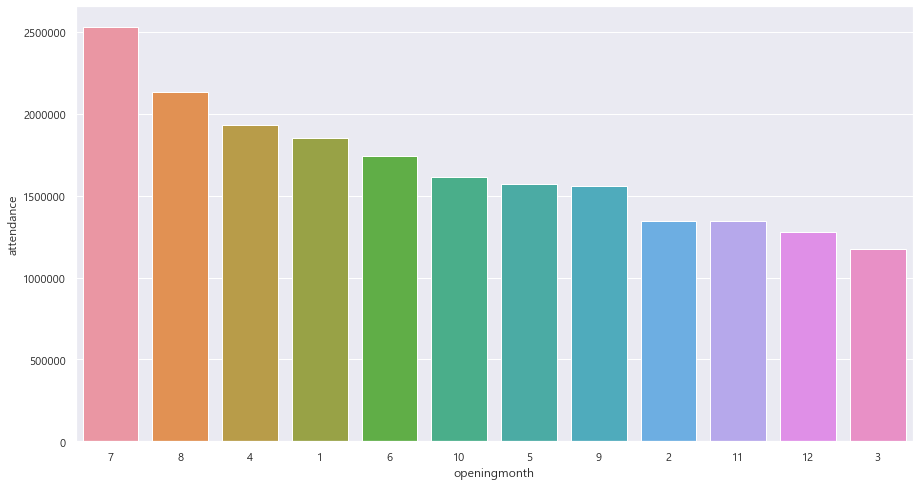

In [59]:
order=movie.groupby(by='openingmonth')['attendance'].mean().sort_values(ascending=False).index
sns.barplot(x=movie_month['openingmonth'], y=movie_month['attendance'], order=order)

### 4-2. 장르별 관객 수

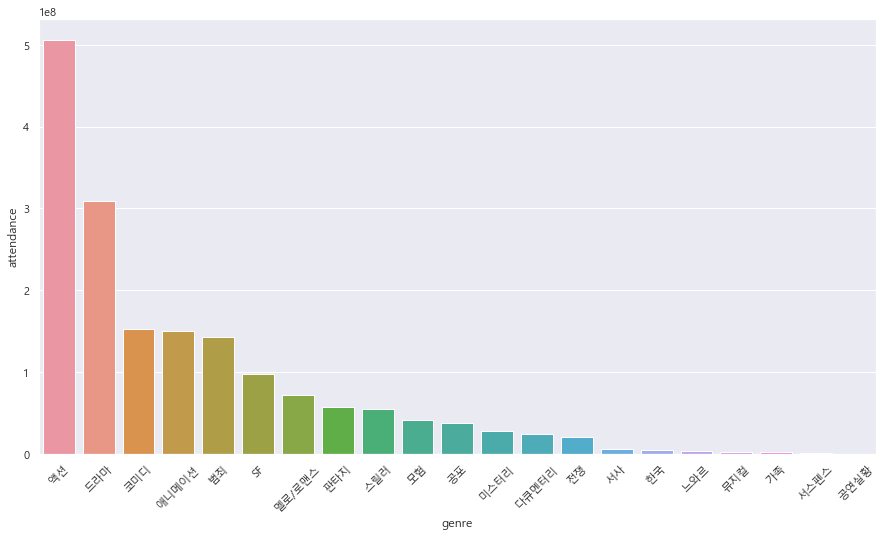

In [60]:
plt.figure(figsize = (15,8))
movie_genre = pd.DataFrame(movie.groupby(by='genre')['attendance'].sum()).reset_index()

order = movie.groupby(by='genre')['attendance'].sum().sort_values(ascending=False).index
plt.xticks(rotation = 45)
sns.barplot(x=movie_genre['genre'], y=movie_genre['attendance'], order=order)

In [133]:
# 장르 범주화

## 코미디 : 0, 다큐멘터리 : 1, 액션 : 2, 판타지 : 3, 드라마 : 4, 범죄 : 5, 
## 애니메이션 : 6,  SF : 7, 모험 :8, 미스터리 : 9, 전쟁 : 10, 멜로/로맨스 : 11, 
## 스릴러, 서스펜스 : 12, 서사 : 13, 공포 : 14, 느와르 : 15, 뮤지컬 : 16,
## 가족 : 17, 그 외 : 18


genre_list=[]

for i in range(len(movie['genre'])):
    
    if movie['genre'][i] == '코미디':
        genre_list.append(0)
        
    elif movie['genre'][i] == '다큐멘터리':
        genre_list.append(1)
    
    elif movie['genre'][i] == '액션':
        genre_list.append(2)
        
    elif movie['genre'][i] == '판타지':
        genre_list.append(3)
        
    elif movie['genre'][i] == '드라마':
        genre_list.append(4)
    
    elif movie['genre'][i] == '범죄':
        genre_list.append(5)
        
    elif movie['genre'][i] == '애니메이션':
        genre_list.append(6)
        
    elif movie['genre'][i] == 'SF':
        genre_list.append(7)
    
    elif movie['genre'][i] == '모험':
        genre_list.append(8)
        
    elif movie['genre'][i] == '미스터리':
        genre_list.append(9)      
        
    elif movie['genre'][i] == '전쟁':
        genre_list.append(10)
    
    elif movie['genre'][i] == '멜로/로맨스':
        genre_list.append(11)
        
    elif movie['genre'][i] == '스릴러' or movie['genre'][i] == '서스펜스' :
        genre_list.append(12)

    elif movie['genre'][i] == '서사':
        genre_list.append(13)
        
    elif movie['genre'][i] == '공포':
        genre_list.append(14)
        
    elif movie['genre'][i] == '느와르':
        genre_list.append(15)
        
    elif movie['genre'][i] == '뮤지컬':
        genre_list.append(16)
        
    elif movie['genre'][i] == '가족':
        genre_list.append(17)
    
    else:
        genre_list.append(18)
        

movie['genre_num'] = genre_list

In [134]:
movie.head()

,moviename,openingdate,sales,attendance,screen,playcount,country,distributor,director,genre,actor,filmrank,openingmonth,genre_num
0,극한직업,2019-01-23,139651845516.0,16265618.0,2003.0,292584.0,한국,(주)씨제이이엔엠,이병헌,코미디,"류승룡(고반장), 이하늬(장형사), 진선규(마형사)",[국내] 15세 관람가,1,0
1,명량,2014-07-30,135748398910.0,17613682.0,1587.0,188611.0,한국,(주)씨제이이엔엠,정세교,다큐멘터리,"김한민, 오타니 료헤이, 이해영",[국내] 12세 관람가,7,1
2,어벤져스: 엔드게임,2019-04-24,122182694160.0,13934592.0,2835.0,242001.0,미국,월트디즈니컴퍼니코리아 유한책임회사,안소니 루소,액션,"로버트 다우니 주니어(토니 스타크 / 아이언맨), 크리스 에반스(스티브 로저스 / ...",[국내] 12세 관람가,4,2
3,베테랑,2015-08-05,105168155250.0,13414009.0,1115.0,199231.0,한국,(주)씨제이이엔엠,류승완,액션,"황정민(서도철), 유아인(조태오), 유해진(최상무)",[국내] 15세 관람가,8,2
4,신과함께-인과 연,2018-08-01,102666146909.0,12274996.0,2235.0,179981.0,한국,롯데컬처웍스(주)롯데엔터테인먼트,김용화,판타지,"하정우(강림), 주지훈(해원맥), 김향기(덕춘)",[국내] 12세 관람가,8,3


### 4-3. 관람등급별 관객 수

In [63]:
movie_rank = pd.DataFrame(movie.groupby('filmrank')['attendance'].sum())
movie_rank

,attendance
filmrank,
[국내] 12세 관람가,451008340.0
[국내] 12세 관람가 [해외] NR,3321443.0
[국내] 12세 관람가 [해외] PG,3891654.0
[국내] 12세 관람가 [해외] PG-13,162266971.0
[국내] 15세 관람가,624146288.0
[국내] 15세 관람가 [해외] NR,4610452.0
[국내] 15세 관람가 [해외] PG-13,82567338.0
[국내] 15세 관람가 [해외] R,22470057.0
[국내] 전체 관람가,88834645.0


In [135]:
## 연령대만 추출 후 숫자형으로 변환
#전체관람가 : 0, 12세관람가 : 1, 15세관람가 : 2, 청소년관람불가 : 3, 그 외 : 4

filmrank_num_list=[]

movie["filmrank"] = [filmrank_num.split()[1] for filmrank_num in movie['filmrank']]

for i in range(len(movie['filmrank'])):
    
    if movie['filmrank'][i] == '전체':
        filmrank_num_list.append(0)
        
    elif movie['filmrank'][i] == '12세':
        filmrank_num_list.append(1)
    
    elif movie['filmrank'][i] == '15세':
        filmrank_num_list.append(2)
        
    elif movie['filmrank'][i] == '청소년':
        filmrank_num_list.append(3)
        
    else:
        filmrank_num_list.append(4)
        

movie['filmrank_num'] = filmrank_num_list
movie.head()

,moviename,openingdate,sales,attendance,screen,playcount,country,distributor,director,genre,actor,filmrank,openingmonth,genre_num,filmrank_num
0,극한직업,2019-01-23,139651845516.0,16265618.0,2003.0,292584.0,한국,(주)씨제이이엔엠,이병헌,코미디,"류승룡(고반장), 이하늬(장형사), 진선규(마형사)",15세,1,0,2
1,명량,2014-07-30,135748398910.0,17613682.0,1587.0,188611.0,한국,(주)씨제이이엔엠,정세교,다큐멘터리,"김한민, 오타니 료헤이, 이해영",12세,7,1,1
2,어벤져스: 엔드게임,2019-04-24,122182694160.0,13934592.0,2835.0,242001.0,미국,월트디즈니컴퍼니코리아 유한책임회사,안소니 루소,액션,"로버트 다우니 주니어(토니 스타크 / 아이언맨), 크리스 에반스(스티브 로저스 / ...",12세,4,2,1
3,베테랑,2015-08-05,105168155250.0,13414009.0,1115.0,199231.0,한국,(주)씨제이이엔엠,류승완,액션,"황정민(서도철), 유아인(조태오), 유해진(최상무)",15세,8,2,2
4,신과함께-인과 연,2018-08-01,102666146909.0,12274996.0,2235.0,179981.0,한국,롯데컬처웍스(주)롯데엔터테인먼트,김용화,판타지,"하정우(강림), 주지훈(해원맥), 김향기(덕춘)",12세,8,3,1


In [38]:
movie_rank_pro = pd.DataFrame(movie_pro.groupby('filmrank')['attendance'].sum())
movie_rank_pro

,attendance
filmrank,
0,182833794.0
1,620488408.0
2,733794135.0
3,176308131.0
4,306012.0


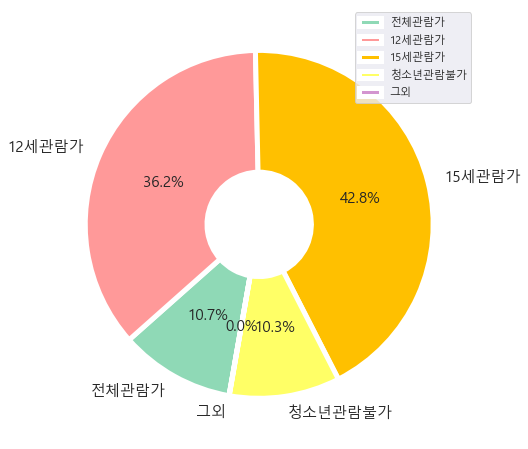

In [37]:
labels = ['전체관람가', '12세관람가', '15세관람가', '청소년관람불가', '그외']
values = list(movie_rank_pro['attendance'])
colors5 = ['#8fd9b6', '#ff9999', '#ffc000', '#ffff66', '#d395d0']
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(values, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors5, wedgeprops=wedgeprops,
       textprops={'fontsize':15})
plt.legend(labels=labels, loc='upper right')
plt.show()

### 4-4. 개봉국가 전처리

In [71]:
movie_country = pd.DataFrame(movie['country'].value_counts()).reset_index().rename(columns={"index":"country", "country":"num"})
movie_country

,country,num
0,한국,440
1,미국,410
2,일본,34
3,"미국,영국",19
4,프랑스,10
...,...,...
59,"중국,홍콩",1
60,"프랑스,영국",1
61,"한국,독일",1
62,"미국,영국,캐나다",1


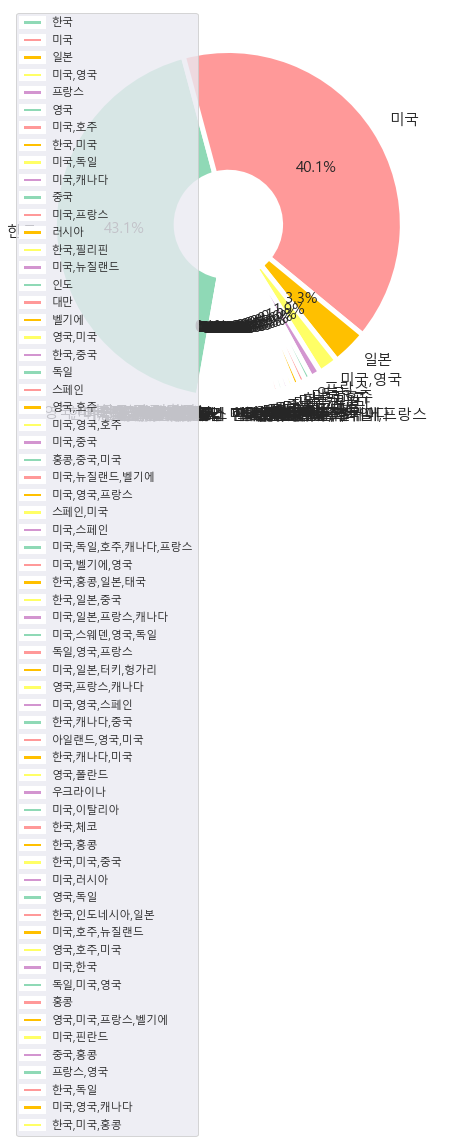

In [76]:
labels = list(movie_country['country'])
values = list(movie_country['num'])
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(values, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors5, wedgeprops=wedgeprops,
       textprops={'fontsize':15})
plt.legend(labels=labels)
plt.show()

In [ ]:
## country == 한국 : 0 , country !== 한국 : 1
country_list=[]
for i in range(len(movie['country'])):
    if movie['country'][i] == '한국':
        country_list.append(0)
    else:
        country_list.append(1)

final_data['country'] = country_list

### 4-5. 배급사별 관람객 수

In [124]:
movie['distributor'].value_counts()

(주)씨제이이엔엠                                 146
롯데쇼핑㈜롯데엔터테인먼트                             108
(주)넥스트엔터테인먼트월드(NEW)                        88
워너브러더스 코리아(주)                              84
유니버설픽쳐스인터내셔널 코리아(유)                        72
                                         ... 
(주)리틀빅픽쳐스,(주)트리니티픽쳐스                        1
(주)드림팩트엔터테인먼트,(주)제이앤씨미디어그룹,TCO(주)더콘텐츠온      1
(주)넥스트엔터테인먼트월드(NEW),(주)에스비에스콘텐츠허브           1
메가박스중앙(주)플러스엠,(주)미디어캐슬,워터홀컴퍼니(주)            1
씨제이포디플렉스 주식회사                               1
Name: distributor, Length: 133, dtype: int64

In [116]:
movie_dist = pd.DataFrame(movie.groupby('distributor')['attendance'].sum().sort_values(ascending=False).head(10))
movie_dist

,attendance
distributor,
"월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아(주)",10494499.0
"월트디즈니컴퍼니코리아 유한책임회사,한국소니픽쳐스릴리징브에나비스타영화㈜",7074867.0
"주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)",4870162.5
"롯데쇼핑㈜롯데엔터테인먼트,(주)싸이더스",4015361.0
(주)와우픽쳐스,3587173.0
"(주)에이스메이커무비웍스,(주)키위미디어그룹",3364712.0
"롯데쇼핑㈜롯데엔터테인먼트,(주)리틀빅픽쳐스",3279296.0
"(주)스튜디오디에이치엘,주식회사 해리슨앤컴퍼니,워너브러더스 코리아(주)",3194693.0
아이러브시네마,3117859.0


In [ ]:
# 국내 메이져 영화사 : CJ E & M, 롯데, 쇼박스, 넥스트엔터테인먼월드(NEW), # 해외 메이져 영화사 : 월트디즈니, 유니버설픽쳐스, 워너스브러더스  -> 0
# 그외 배급사 : 1

distributor_list=[]

for i in range(len(final_data['distributor'])):
    if final_data['distributor'][i].find('씨제이이엔엠') >= 0 or final_data['distributor'][i].find('CJ ENM') >= 0 or final_data['distributor'][i].find('롯데') >= 0 or final_data['distributor'][i].find('쇼박스') >= 0 or final_data['distributor'][i].find('(NEW)') >=0 or final_data['distributor'][i].find('월트디즈니') >= 0 or final_data['distributor'][i].find('유니') >=0 or final_data['distributor'][i].find('워너브러더스') >= 0:
        distributor_list.append(0)
    else:
        distributor_list.append(1)
    
final_data['distributor'] = distributor_list

### 4-6. 감독별 관람객 수

In [136]:
direc_num = movie['director'].value_counts()
direc_num

유야마 쿠니히코    6
우민호         6
시즈노 코분      6
폴 앤더슨       6
크리스토퍼 놀란    6
           ..
월트 도른       1
샘 테일러 존슨    1
우선호         1
최호          1
강일수         1
Name: director, Length: 692, dtype: int64

In [138]:
# 감독의 이전 영화 관람객 수 / 영화 수
for dir in movie['director'].unique():
    movie_audience = movie['attendance'][movie['director']==dir].sum()
    movie_num = movie['director'][movie['director']==dir]
    
    movie['director'][movie['director']==dir] = int(movie_audience / director.count())
    
movie.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,moviename,openingdate,sales,attendance,screen,playcount,country,distributor,director,genre,actor,filmrank,openingmonth,genre_num,filmrank_num
0,극한직업,2019-01-23,139651845516.0,16265618.0,2003.0,292584.0,한국,(주)씨제이이엔엠,10252329,코미디,"류승룡(고반장), 이하늬(장형사), 진선규(마형사)",15세,1,0,2
1,명량,2014-07-30,135748398910.0,17613682.0,1587.0,188611.0,한국,(주)씨제이이엔엠,8982706,다큐멘터리,"김한민, 오타니 료헤이, 이해영",12세,7,1,1
2,어벤져스: 엔드게임,2019-04-24,122182694160.0,13934592.0,2835.0,242001.0,미국,월트디즈니컴퍼니코리아 유한책임회사,20449709,액션,"로버트 다우니 주니어(토니 스타크 / 아이언맨), 크리스 에반스(스티브 로저스 / ...",12세,4,2,1
3,베테랑,2015-08-05,105168155250.0,13414009.0,1115.0,199231.0,한국,(주)씨제이이엔엠,11364578,액션,"황정민(서도철), 유아인(조태오), 유해진(최상무)",15세,8,2,2
4,신과함께-인과 연,2018-08-01,102666146909.0,12274996.0,2235.0,179981.0,한국,롯데컬처웍스(주)롯데엔터테인먼트,9737945,판타지,"하정우(강림), 주지훈(해원맥), 김향기(덕춘)",12세,8,3,1


## 5. Correlation

In [157]:
### column 순서 바꾸기(attendance가 젤 마지막에)
col = movie.columns.to_numpy()
col = col[[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 3]]
movie = movie[col]
movie.head()

,moviename,openingdate,sales,screen,playcount,country,distributor,director,genre,actor,filmrank,openingmonth,attendance
0,극한직업,2019-01-23,139651845516.0,2003.0,292584.0,0,(주)씨제이이엔엠,이병헌,0,3,2,1,16265618.0
1,명량,2014-07-30,135748398910.0,1587.0,188611.0,0,(주)씨제이이엔엠,정세교,1,3,1,7,17613682.0
2,어벤져스: 엔드게임,2019-04-24,122182694160.0,2835.0,242001.0,1,월트디즈니컴퍼니코리아 유한책임회사,안소니 루소,2,3,1,4,13934592.0
3,베테랑,2015-08-05,105168155250.0,1115.0,199231.0,0,(주)씨제이이엔엠,류승완,2,3,2,8,13414009.0
4,신과함께-인과 연,2018-08-01,102666146909.0,2235.0,179981.0,0,롯데컬처웍스(주)롯데엔터테인먼트,김용화,3,3,1,8,12274996.0


In [42]:
movie_pro.corr()

,sales,attendance,screen,playcount,country,genre,actor,filmrank
sales,1.0,1.0,0.7,0.9,-0.1,-0.1,0.1,0.1
attendance,1.0,1.0,0.6,0.9,-0.1,-0.1,0.1,0.1
screen,0.7,0.6,1.0,0.8,-0.1,-0.1,0.0,0.0
playcount,0.9,0.9,0.8,1.0,-0.2,-0.1,0.0,0.1
country,-0.1,-0.1,-0.1,-0.2,1.0,-0.1,-0.0,-0.3
genre,-0.1,-0.1,-0.1,-0.1,-0.1,1.0,-0.0,0.1
actor,0.1,0.1,0.0,0.0,-0.0,-0.0,1.0,-0.0
filmrank,0.1,0.1,0.0,0.1,-0.3,0.1,-0.0,1.0


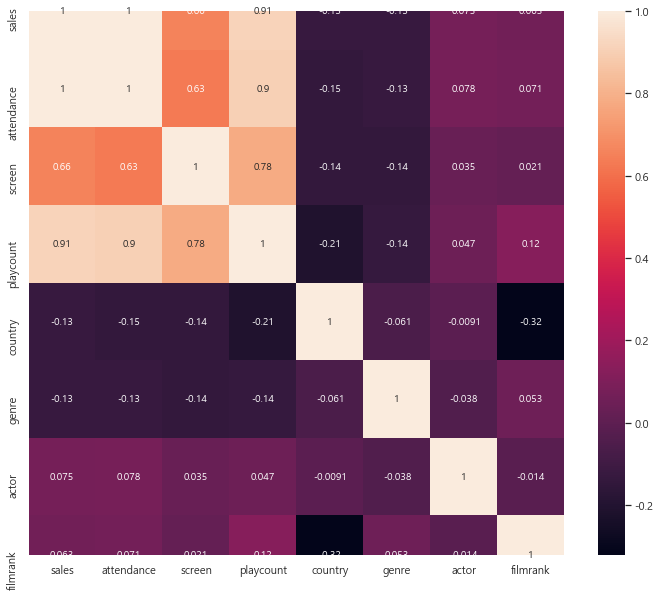

In [50]:
plt.figure(figsize = (12, 10))
plt.rc('font', size=10)
sns.heatmap(movie_pro.corr(), annot=True)